In [9]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import save_model, load_model, Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import applications
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from itertools import chain
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import time

In [2]:
dog_list = glob("C:/Users/user/Downloads/data/train/dog.*")
cat_list = glob("C:/Users/user/Downloads/data/train/cat.*")
data_list = list(chain(dog_list, cat_list))
y = []
for i in data_list:
    if 'dog' in i:
        y.append(0)
    else:
        y.append(1)
y = np.array(y)
X = np.zeros((25000,150,150,3))
for idx, file in enumerate(data_list):
    dt = plt.imread(file)
    dt = cv.resize(dt,(150,150)).reshape(1,150,150,-1)
    X[idx] = dt[:,:,:,:3]
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_, y_)

In [3]:
conv_base = VGG16(input_shape=(150,150,3),include_top=False)

In [4]:
input_ = Input(shape=(150,150,3))
layer_ = input_
for layer in conv_base.layers[1:]:
    layer_ = layer(layer_)
layer_ = Flatten()(layer_)
layer_ = Dense(256,activation='relu')(layer_)
layer_ = Dense(128,activation='relu')(layer_)
layer_ = Dense(1,activation='sigmoid')(layer_)

model_test = Model(inputs=[input_],outputs=[layer_])

In [5]:
model_test.layers[1].get_weights()[0].sum()

-4.212706

In [6]:
conv_base.layers[1].get_weights()[0].sum()

-4.212706

In [7]:
def cat_dog(x):
    img = plt.imread(x)
    dt = cv.resize(img,(150,150)).reshape(1,150,150,-1)
    dt = dt[:,:,:,:3]
    result = np.where(model_test.predict(dt) > 0.5, '고양이', '강아지')[0]
    print(result)
    plt.imshow(img)
    plt.show()

1/1 [==============================] - 0s 358ms/step
['고양이']


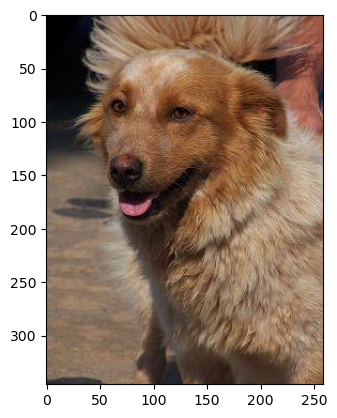

1/1 [==============================] - 0s 62ms/step
['강아지']


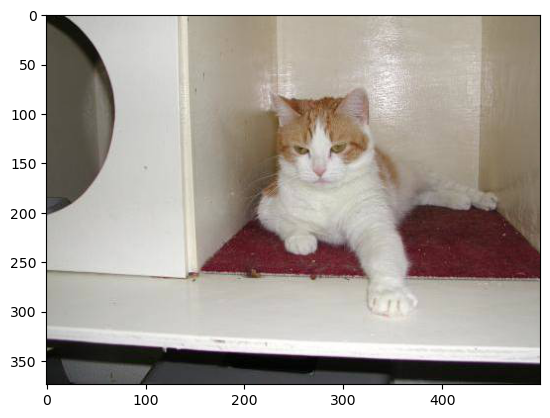

1/1 [==============================] - 0s 54ms/step
['고양이']


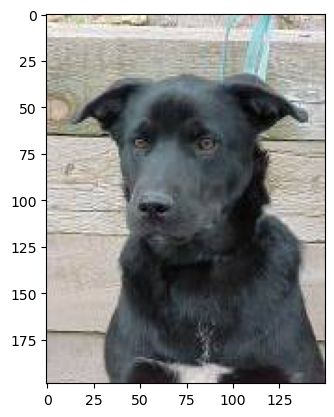

1/1 [==============================] - 0s 58ms/step
['강아지']


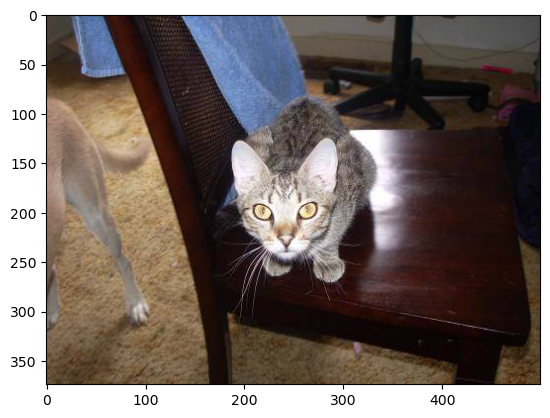

1/1 [==============================] - 0s 63ms/step
['강아지']


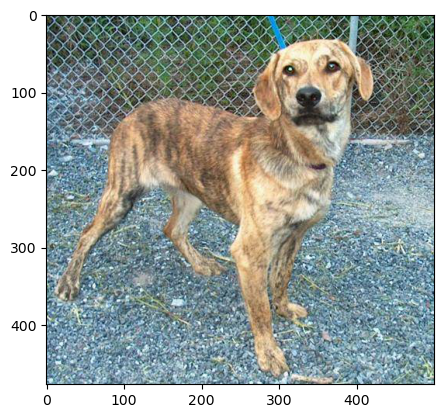

1/1 [==============================] - 0s 55ms/step
['고양이']


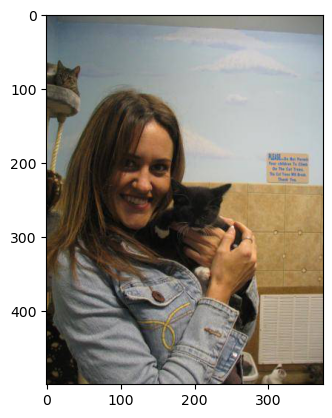

1/1 [==============================] - 0s 62ms/step
['강아지']


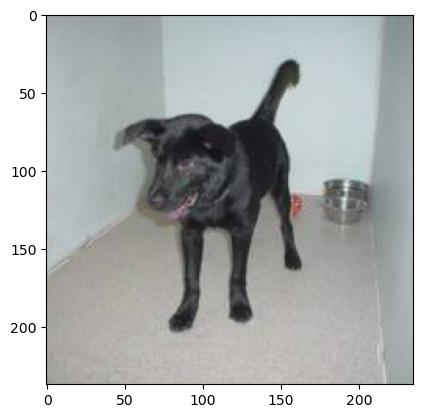

1/1 [==============================] - 0s 49ms/step
['고양이']


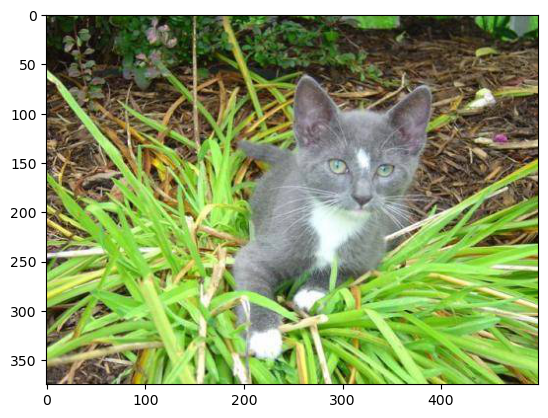

1/1 [==============================] - 0s 64ms/step
['강아지']


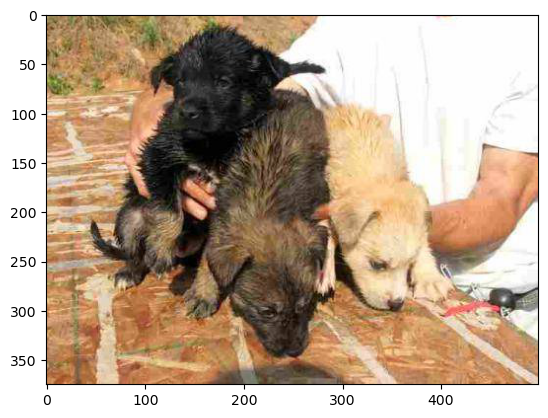

1/1 [==============================] - 0s 57ms/step
['고양이']


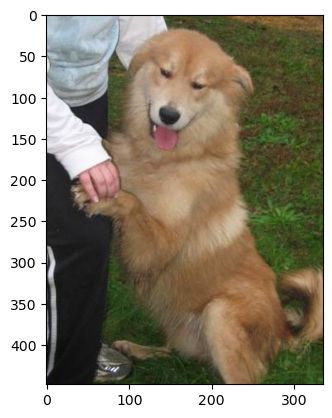

In [8]:
for i in np.random.choice(np.arange(25000),10):
    cat_dog(data_list[i])

In [11]:
save_model(model_test,'cat_dog_predict.h5')

C:\Users\user\AppData\Local\Temp\ipykernel_4612\1785299915.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_test,'cat_dog_predict.h5')


In [12]:
animal_predict_model = load_model('cat_dog_predict.h5')